In [19]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout,BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam 
import pandas as pd
import cv2 as cv2
import numpy as np 
from matplotlib import pyplot as plt 
import os 
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
dataset = r"C:\Breast dataset"
Yes_path = r"C:\Breast dataset\1"
No_path = r"C:\Breast dataset\0"

(50, 50, 3)


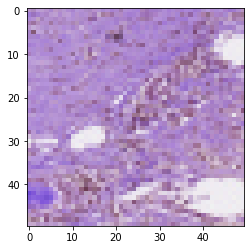

In [4]:
image = cv2.imread(Yes_path+'\\9023_idx5_x1301_y1351_class1.png')
print(image.shape)
plt.imshow(image)

In [5]:
vals = [Yes_path, No_path]
print(os.listdir(vals[0]).__len__())
print(os.listdir(vals[1]).__len__())

288
583


In [6]:
pathdir = [Yes_path, No_path]
classes = ['Yes', 'No']
filepaths = []
labels = []
for i, j in zip(pathdir, classes):
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())

['9023_idx5_x1301_y1351_class1.png', '9023_idx5_x1301_y1401_class1.png', '9023_idx5_x1301_y1451_class1.png', '9023_idx5_x1301_y1501_class1.png', '9023_idx5_x1301_y1551_class1.png', '9023_idx5_x1301_y1601_class1.png', '9023_idx5_x1301_y1651_class1.png', '9023_idx5_x1301_y1751_class1.png', '9023_idx5_x1301_y1801_class1.png', '9023_idx5_x1301_y1851_class1.png', '9023_idx5_x1301_y1901_class1.png', '9023_idx5_x1301_y1951_class1.png', '9023_idx5_x1351_y1301_class1.png', '9023_idx5_x1351_y1351_class1.png', '9023_idx5_x1351_y1401_class1.png', '9023_idx5_x1351_y1451_class1.png', '9023_idx5_x1351_y1501_class1.png', '9023_idx5_x1351_y1551_class1.png', '9023_idx5_x1351_y1601_class1.png', '9023_idx5_x1351_y1651_class1.png', '9023_idx5_x1351_y1701_class1.png', '9023_idx5_x1351_y1751_class1.png', '9023_idx5_x1351_y1801_class1.png', '9023_idx5_x1351_y1851_class1.png', '9023_idx5_x1351_y1901_class1.png', '9023_idx5_x1351_y1951_class1.png', '9023_idx5_x1351_y2001_class1.png', '9023_idx5_x1351_y2051_clas

In [7]:
dataset = list(zip(filepaths, labels))
pathframe = pd.DataFrame(dataset, columns=['filepaths', 'labels'])

In [8]:
pathframe.__len__()
pathframe.tail()

,filepaths,labels
866,C:\Breast dataset\0\9023_idx5_x951_y751_class0...,No
867,C:\Breast dataset\0\9023_idx5_x951_y801_class0...,No
868,C:\Breast dataset\0\9023_idx5_x951_y851_class0...,No
869,C:\Breast dataset\0\9023_idx5_x951_y901_class0...,No
870,C:\Breast dataset\0\9023_idx5_x951_y951_class0...,No


In [9]:
print(pathframe['labels'].value_counts())

No     583
Yes    288
Name: labels, dtype: int64


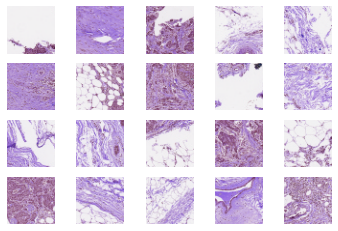

In [10]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(pathframe.filepaths[vals]))
    plt.axis('off')
plt.show()

In [11]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=0)
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(783, 2) (88, 2) (704, 2) (79, 2)


In [15]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 40 , width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                  zoom_range=0.2, horizontal_flip = True, vertical_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [16]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(50,50), class_mode = 'binary', shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(50,50), class_mode = 'binary', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(50,50), class_mode = 'binary', shuffle=False)

Found 704 validated image filenames belonging to 2 classes.
Found 79 validated image filenames belonging to 2 classes.
Found 88 validated image filenames belonging to 2 classes.


{'No': 0, 'Yes': 1}
(16, 50, 50, 3)


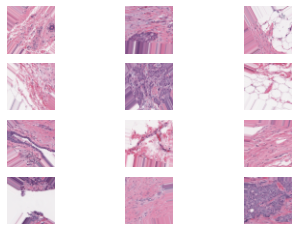

In [17]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)

for i in range(0, 12):
    val = train_gen[0][0][i]
    plt.subplot(4,3,i+1)
    plt.imshow(val)
    plt.axis('off')
plt.show()

In [20]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape= (150,150,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [21]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2, min_delta= 0.01)
model.compile(loss='binary_crossentropy', optimizer= Adam(lr=0.01), metrics=['accuracy'])
model.fit(train_gen, validation_data= valid_gen, epochs=12, verbose=1)

C:\Users\KIIT\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/12
44/44 [==============================] - 63s 616ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 2/12
44/44 [==============================] - 21s 478ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 3/12
44/44 [==============================] - 21s 480ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 4/12
44/44 [==============================] - 22s 510ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 5/12
44/44 [==============================] - 22s 493ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 6/12
44/44 [==============================] - 21s 484ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 7/12
44/44 [==============================] - 22s 488ms/step - loss: nan - accuracy: 0.6619 - val_loss: nan - val_accuracy: 0.7468
Epoch 8/12
44/44 [=======================

In [22]:
model.evaluate(test_gen)

6/6 [==============================] - 2s 90ms/step - loss: nan - accuracy: 0.6591


[nan, 0.6590909361839294]